In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


preproccesing data

In [6]:
# Step 1: Load Dataset
data = pd.read_csv('climate_data.csv')

# Step 2: Select Specific Column
# Misalnya, kita ingin mengambil kolom 'curah_hujan'
selected_column = data[['date', 'RR']]

# Step 3: Save the Selected Column to a New File
selected_column.to_csv('curah_hujan_indonesia.csv', index=False)

Test MSE: 14.833809115947389


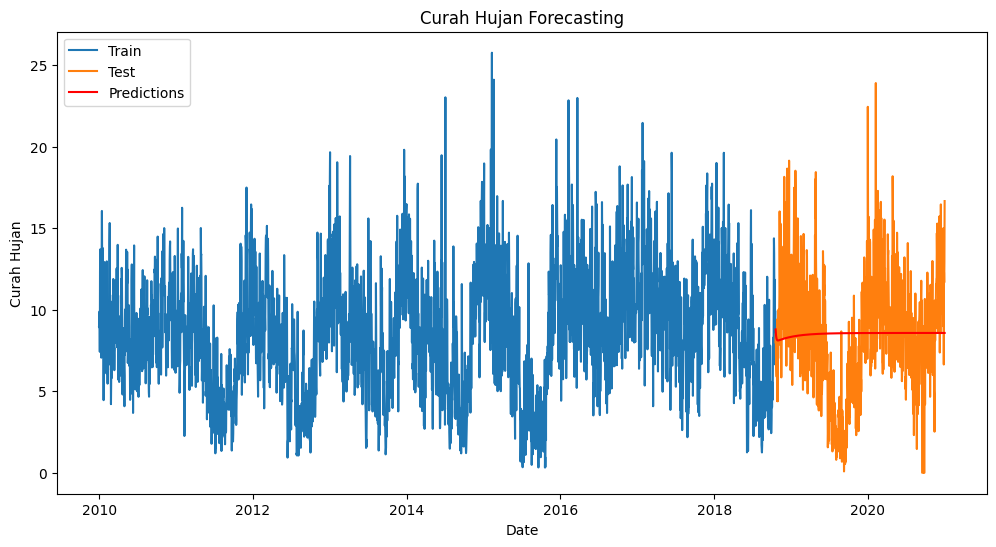

In [18]:
# Step 1: Load Dataset
data = pd.read_csv('curah_hujan_indonesia.csv', parse_dates=['date'], dayfirst=True)

data['date'] = pd.to_datetime(data['date'], dayfirst=True)
data = data.set_index('date')

# Menghapus duplikasi dengan mengambil rata-rata curah hujan untuk tanggal yang sama
data = data.groupby(data.index).mean()

# Memastikan frekuensi harian
data = data.asfreq('D')
# Step 3: Split Data into Train and Test Sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Step 4: Build and Train the ARIMA Model
model = ARIMA(train, order=(2,0,2))  # order=(p,d,q) sesuaikan dengan hasil ACF dan PACF
model_fit = model.fit()

# Step 5: Make Predictions
predictions = model_fit.forecast(steps=len(test))

# Evaluate the model
error = mean_squared_error(test, predictions)
print(f'Test MSE: {error}')

# Plotting the results
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Curah Hujan')
plt.title('Curah Hujan Forecasting')
plt.legend()
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller

# Uji stasioneritas
result = adfuller(data['RR'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -4.523856669363904
p-value: 0.00017801664621409867


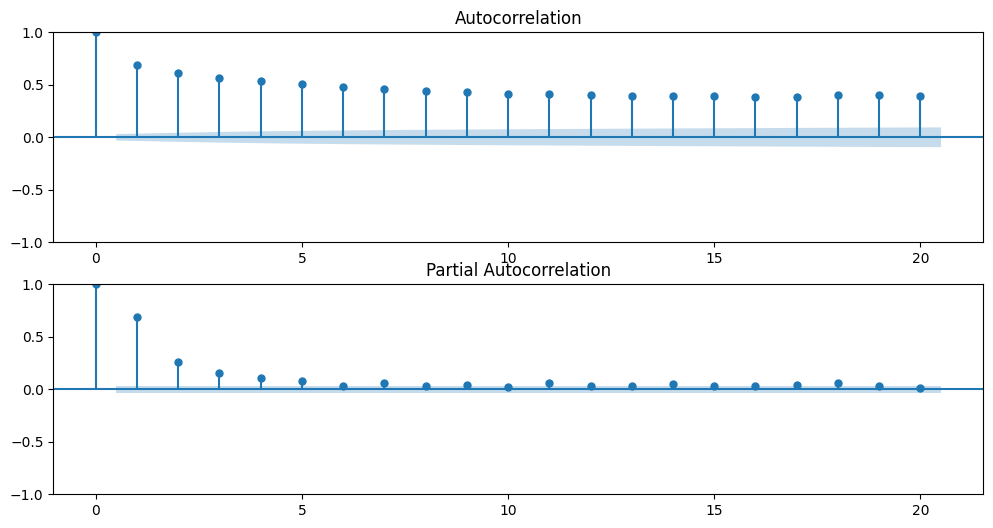

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(211)
plot_acf(data, ax=plt.gca(), lags=20)
plt.subplot(212)
plot_pacf(data, ax=plt.gca(), lags=20)
plt.show()


In [17]:
import itertools
import warnings
warnings.filterwarnings("ignore")

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets (optional for seasonal data)
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = float("inf")
best_pdq = None

for param in pdq:
    try:
        model = ARIMA(train, order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except:
        continue

print(f'Best ARIMA{best_pdq} model with AIC: {best_aic}')


Best ARIMA(2, 0, 2) model with AIC: 15033.647355889148
